Importing the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Mounting the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive

Mounted at /content/drive
/content/drive


Verify the drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/ML_CS539")
!ls

Reading the training and testing dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML DS539/CoLab/training.csv', encoding='latin1')
test_data = pd.read_csv('/content/drive/MyDrive/ML DS539/CoLab/testing.csv', encoding='latin1')

Dropping columns

In [ ]:
col = ["Next_Year_Top_10", "state"]

for i in col:
    data = data.drop(i, axis=1)
    test_data = test_data.drop(i, axis=1)

#data,drop(col, axis=1) works too! -LM

In [ ]:
X = data.drop("Next_Year_Crime_Rate", axis=1)
Y = data["Next_Year_Crime_Rate"]

In [ ]:
X_test = test_data.drop("Next_Year_Crime_Rate", axis=1)
Y_test = test_data["Next_Year_Crime_Rate"]

Pre-processing the dataset

In [ ]:
X["year"] = [(1 + (i-1980)) for i in X["year"]]
X_test["year"] = [(1 + (i-1980)) for i in X_test["year"]]

#This allows for the scaling of the years to be the same (i.e. 1980 is the same distance away from 1981 as 1981 is from 1982) and the timeline/linearity to stay the same as well (i.e. 1980 < 1981) -LM

In [ ]:
from sklearn.linear_model import LinearRegression 
regressors = LinearRegression()
model = regressors.fit(X,Y)

In [ ]:
ytest_pred = model.predict(X_test)
ytrain_pred = model.predict(X)

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics
AC = r2_score(Y_test, ytest_pred)
AC2 = r2_score(Y, ytrain_pred)
print("Test score accuracy: ")
print (int((AC) * 100), '%')
print("Training score accuarcy: ")
print (int((AC2) * 100), '%')


print ("mean_absolute_error :",metrics.mean_absolute_error(Y_test, ytest_pred))
#print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(Y_test, ytest_pred))
#print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(Y_test, ytest_pred)))

Test score accuracy: 
34 %
Training score accuarcy: 
81 %
mean_absolute_error : 1.3809397907477883
mean_squared_error :  5.033368652729703
root_mean_squared_error :  2.243517027510534


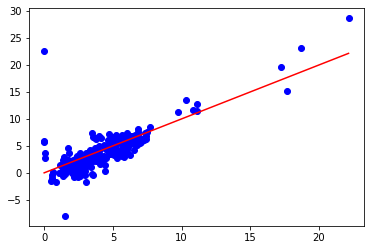

In [ ]:
plt.figsize=((10,10))
plt.scatter(Y_test, ytest_pred, color = 'blue')
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], color = 'red')
plt.show()

In [ ]:
#Regularization Techniques
#Ridge Regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=1, normalize=True)
ridgereg.fit(X,Y)
y_pred_Ridge = ridgereg.predict(X_test)

AC_ridge = r2_score(Y_test, y_pred_Ridge)
print("Test score accuracy: ")
print (int((AC_ridge) * 100), '%')

print ("mean_absolute_error :",metrics.mean_absolute_error(Y_test, y_pred_Ridge))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(Y_test, y_pred_Ridge))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(Y_test, y_pred_Ridge)))

Test score accuracy: 
41 %
mean_absolute_error : 1.2298163848934855


mean_squared_error :  4.495623276468651


root_mean_squared_error :  2.12028848897235


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


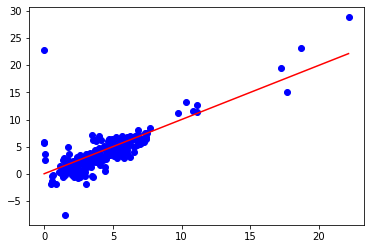

In [ ]:
plt.figsize=((10,10))
plt.scatter(Y_test, y_pred_Ridge, color = 'blue')
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], color = 'red')
plt.show()

In [ ]:
#Lasso
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X,Y)
y_pred_Lasso = lassoreg.predict(X_test)

AC_lasso = r2_score(Y_test, y_pred_Lasso)
print("Test score accuracy: ")
print (int((AC_lasso) * 100), '%')

print ("mean_absolute_error :",metrics.mean_absolute_error(Y_test, y_pred_Lasso))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(Y_test, y_pred_Lasso))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(Y_test, y_pred_Lasso)))

Test score accuracy: 
59 %
mean_absolute_error : 0.8665332796298334


mean_squared_error :  3.1032182989008157


root_mean_squared_error :  1.7615953845593533


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


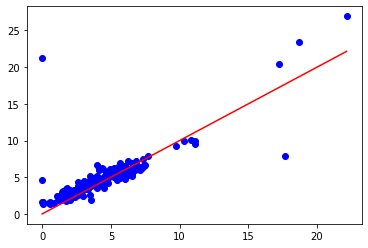

In [ ]:
plt.figsize=((10,10))
plt.scatter(Y_test, y_pred_Lasso, color = 'blue')
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], color = 'red')
plt.show()